In [ ]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')
path='/content/drive/My Drive/Bengaluru_House_Data.csv'
df=pd.read_csv(path)
df.head()
df.tail()
print(df.shape)
df.info()
print(df.dtypes)

print(df.isnull().sum())
print(df.drop('society', axis=1))
df['bath'] = df['bath'].fillna(df['bath'].median())
df['balcony'] = df['balcony'].fillna(0)
def convert_sqft(x):
  if isinstance(x,str) and '-' in x:
    a,b=x.split('-')
    return(float(a)+float(b))/2
  try:
    return float(x)
  except:
    return None
df['total_sqft']=df['total_sqft'].apply(convert_sqft)
df.dropna(subset=['total_sqft'],inplace=True)
df.drop_duplicates(inplace=True)
df.reset_index(drop=True,inplace=True)
df.head()
x = str(x)

if re.match(r'^\d+(\.\d+)?$', x):
  return float(x)

    # Case 2: if it's a range like "2100 - 2850"
if '-' in x:
  a, b = x.split('-')
  try:
    return (float(a) + float(b)) / 2
  except:
    return np.nan

    # Case 3: extract first number (e.g., "34.46Sq. Meter")
    match = re.search(r'(\d+(\.\d+)?)', x)
    if match:
        return float(match.group(1))

    return np.nan

df['total_sqft'] = df['total_sqft'].apply(convert_sqft)

# Convert numeric columns safely
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['bath'] = pd.to_numeric(df['bath'], errors='coerce')

# Drop rows where total_sqft or price is missing
df = df.dropna(subset=['total_sqft', 'price'])

print(df['location'].nunique())
avg_price_per_location = df.groupby('location')['price'].mean().sort_values(ascending=False)
print('\nAverage Price per Location:')
print(avg_price_per_location.head())
highest_avg_price_value = avg_price_per_location.iloc[0]
highest_avg_price_name = avg_price_per_location.index[0]
print(f"The location with the highest average price is: {highest_avg_price_name} with an average price of {highest_avg_price_value:.2f} lakhs.")
df[['total_sqft', 'bath', 'price']].corr()
corr_sqft_price = corr.loc['total_sqft', 'price']
print("\n5) Interpretation:")

if corr_sqft_price > 0.7:
    print("• Strong positive correlation → Larger houses generally have higher prices.")
elif corr_sqft_price > 0.4:
    print("• Moderate correlation → Larger houses often cost more, but not always.")
else:
    print("• Weak correlation → Size alone does NOT determine price.")
#TASK 5
import matplotlib.pyplot as plt
import seaborn as sns

plt.hist(df,main="Distributi")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(13320, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB
area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: ob

,total_sqft,bath,price
total_sqft,1.000000,0.385607,0.574008
bath,0.385607,1.000000,0.450843
price,0.574008,0.450843,1.000000


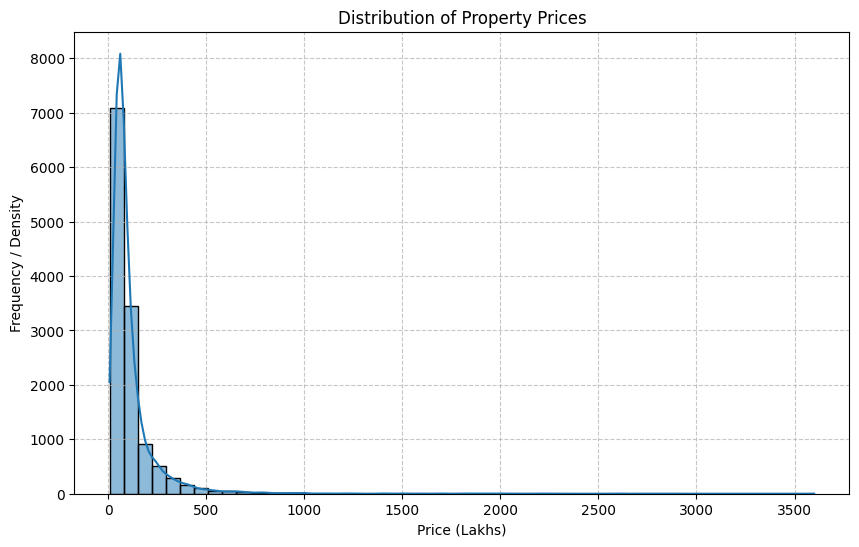

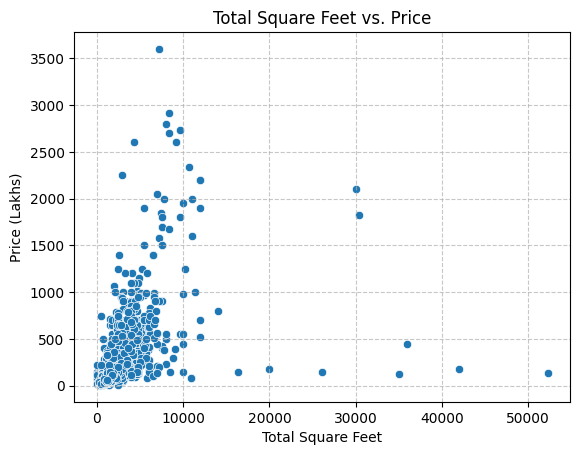

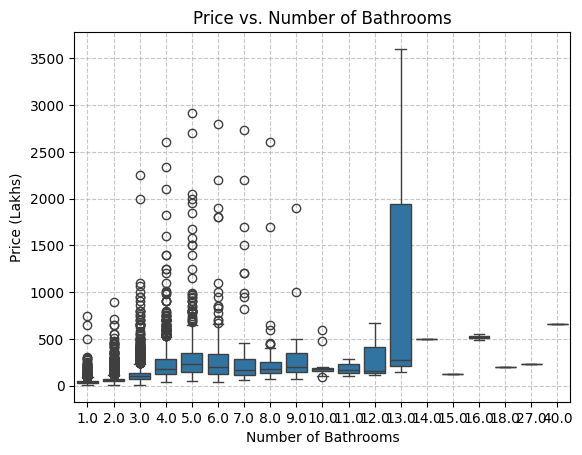

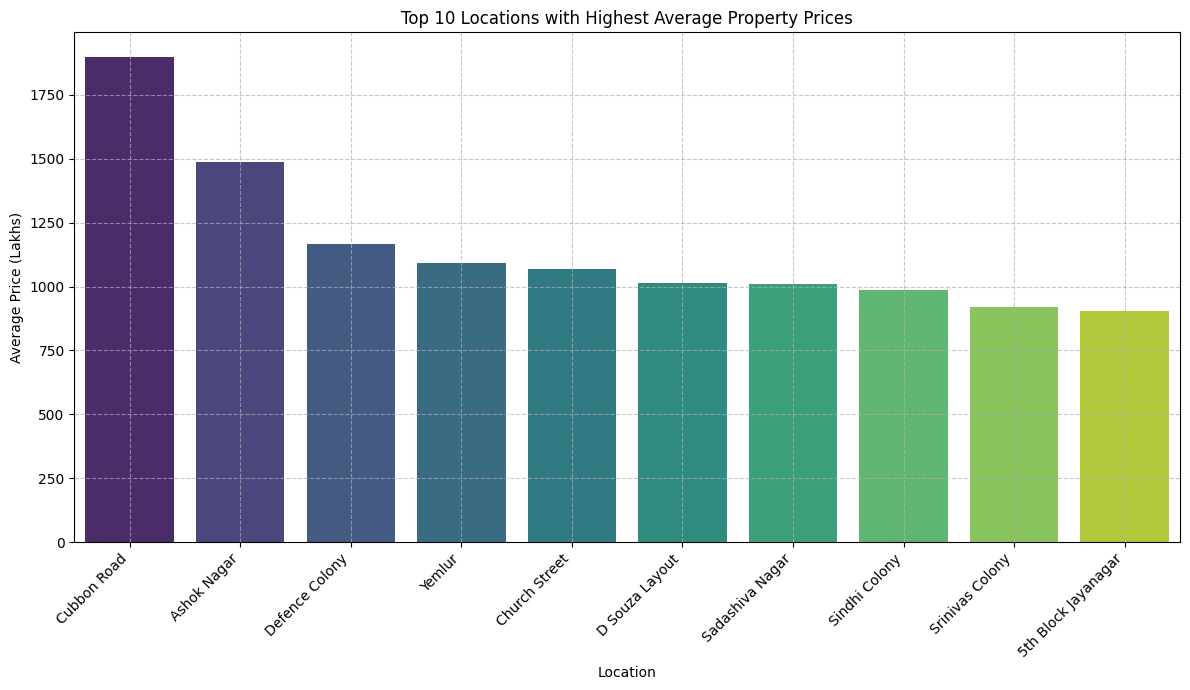

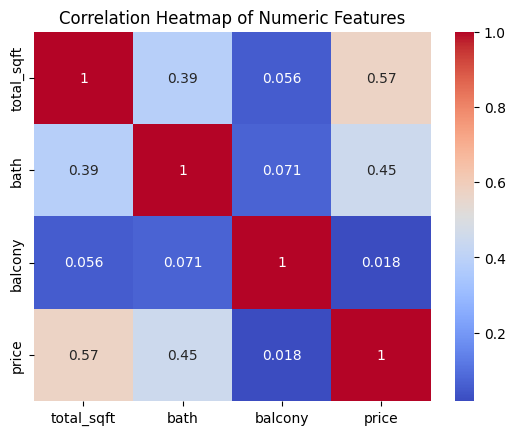

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, bins=50) # Adjust bins as needed for better visualization
plt.title('Distribution of Property Prices')
plt.xlabel('Price (Lakhs)')
plt.ylabel('Frequency / Density')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()
sns.scatterplot(x='total_sqft', y='price', data=df)
plt.title('Total Square Feet vs. Price')
plt.xlabel('Total Square Feet')
plt.ylabel('Price (Lakhs)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()
sns.boxplot(x='bath',y='price',data=df)
plt.title('Price vs. Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price (Lakhs)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()
# Get the top 10 locations with the highest average prices
top_10_locations = avg_price_per_location.head(10).reset_index()

plt.figure(figsize=(12, 7))
sns.barplot(x='location', y='price', data=top_10_locations,palette='viridis',hue='location',legend=False)
plt.title('Top 10 Locations with Highest Average Property Prices')
plt.xlabel('Location')
plt.ylabel('Average Price (Lakhs)')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Select only numeric columns for correlation heatmap
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm') # Added cmap for better visualization
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

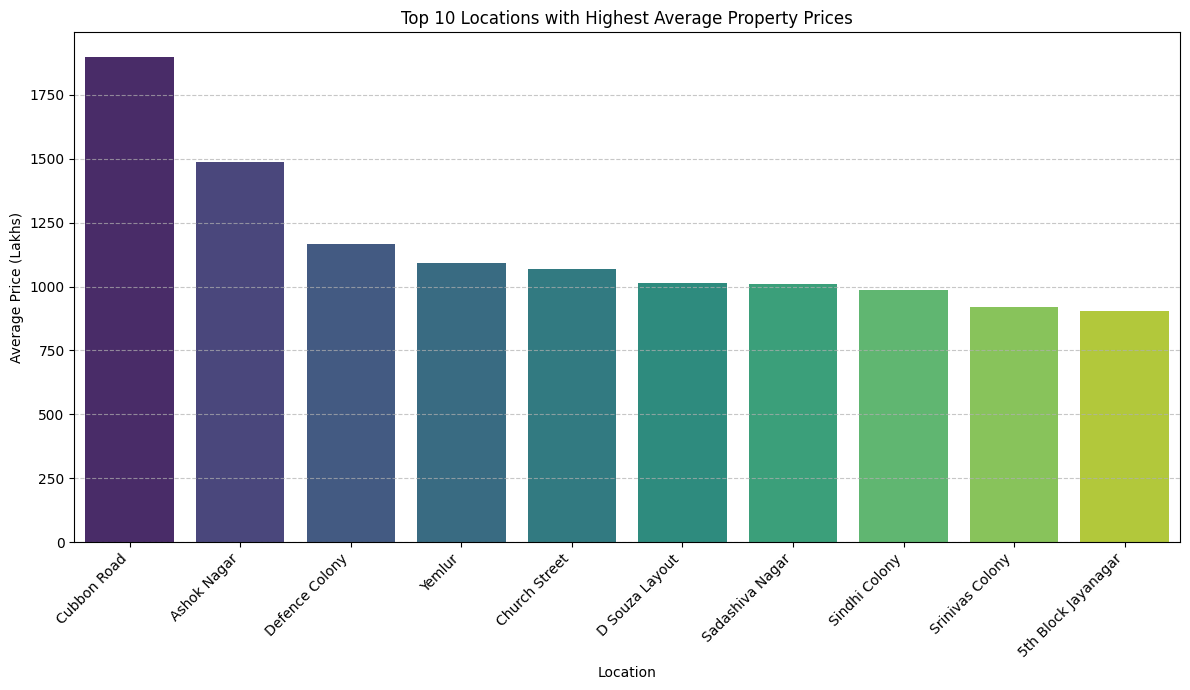

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 10 locations with the highest average prices
top_10_locations = avg_price_per_location.head(10).reset_index()

plt.figure(figsize=(12, 7))
sns.barplot(x='location', y='price', data=top_10_locations, palette='viridis', hue='location', legend=False)
plt.title('Top 10 Locations with Highest Average Property Prices')
plt.xlabel('Location')
plt.ylabel('Average Price (Lakhs)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Task 1 — Load & Inspect the Dataset
Load the dataset into your notebook.
Display first and last 5 rows.
Print .shape and .info().
Show list of unique product categories.
Identify columns that require cleaning or type conversion.

In [ ]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')
path='/content/drive/My Drive/amazon_products_dataset.csv'
df=pd.read_csv(path)
df.head()
df.tail()
print(df.shape)
print(df['category'].unique())
df.info()
print(df.dtypes)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(2000, 7)
['Laptop' 'Smartwatch' 'Headphones' 'Camera' 'Monitor' 'Speaker' 'Tablet'
 'Smartphone' nan]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2000 non-null   object 
 1   brand           2000 non-null   object 
 2   category        1998 non-null   object 
 3   actual_price    1998 non-null   float64
 4   discount_price  1999 non-null   float64
 5   rating          1996 non-null   float64
 6   rating_count    1996 non-null   float64
dtypes: float64(4), object(3)
memory usage: 109.5+ KB
title              object
brand              object
category           object
actual_price      float64
discount_price    float64
rating            float64
rating_count      float64
dtype: object


Task 2 — Clean the Dataset
Identify missing values using .isnull().sum().
Fill missing numeric values (discount_price, rating, etc.) using mean or median.
Fill missing categorical values (brand, category) with "Unknown".
Remove all duplicate rows.
Convert numeric columns to their correct data types.
Reset index after cleaning.




In [ ]:
print(df.isnull().sum())

# Fill numeric missing values with their mean
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Fill categorical missing values with 'Unknown'
# Corrected: Do not assign back if inplace=True, or remove inplace and assign
df['brand'] = df['brand'].fillna('Unknown')
df['category'] = df['category'].fillna('Unknown')

df.drop_duplicates(inplace=True)

# Convert rating to numeric safely (using pd.to_numeric instead of pd.to_float)
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

df.reset_index(drop=True, inplace=True)

print('\nAfter cleaning:')
print(df.isnull().sum()) # Verify missing values are handled
print(df.dtypes) # Verify data types


title             0
brand             0
category          2
actual_price      2
discount_price    1
rating            4
rating_count      4
dtype: int64

After cleaning:
title             0
brand             0
category          0
actual_price      0
discount_price    0
rating            0
rating_count      0
dtype: int64
title              object
brand              object
category           object
actual_price      float64
discount_price    float64
rating            float64
rating_count      float64
dtype: object


Task 3 — Data Analysis
Identify the top 5 most expensive products (actual_price).
Find the brand with the highest number of products.
Compute the average discount percentage for each brand.
Identify products with rating ≥ 4.5 and rating_count ≥ 2000.
Compute category-wise average price.

In [ ]:
top_5_expensive=df.nlargest(5,'actual_price')
print(top_5_expensive)
brand_with_highest_products=df['brand'].value_counts().idxmax()
average_discount_per_brand=df.groupby('brand')['discount_price'].mean()
print(average_discount_per_brand)
products_with_high_rating=df[(df['rating']>=4.5)&(df['rating_count']>=2000)]
print(products_with_high_rating)
category_wise_average_price=df.groupby('category')['actual_price'].mean()
print(category_wise_average_price)


                 title  brand    category  actual_price  discount_price  \
1383    Android Tablet    JBL      Laptop       79993.0         78094.0   
1974     Gaming Laptop     LG     Monitor       79869.0         77173.0   
1403  4K Action Camera   Sony  Headphones       79857.0         77469.0   
1351    Android Tablet   Sony     Monitor       79853.0         78831.0   
42       Gaming Laptop  Apple  Smartwatch       79826.0         76919.0   

      rating  rating_count  
1383     3.0        7666.0  
1974     2.6        5232.0  
1403     2.7        1379.0  
1351     4.8        7596.0  
42       3.8       10252.0  
brand
Apple      35889.731579
Boat       36353.115888
Dell       37570.078531
HP         38354.180583
JBL        37380.390821
LG         35108.571154
Mi         36542.437569
OnePlus    39090.550490
Samsung    37933.346049
Sony       37102.337019
Name: discount_price, dtype: float64
                               title    brand    category  actual_price  \
4                

Task 4 — Programming Task: Feature Engineering + Logical Filters
Task 4A — Create New Columns
Write code to create:
discount_percent = ((actual_price - discount_price) / actual_price) * 100
price_category based on:
actual_price < 500 → "Budget"
500 ≤ price < 2000 → "Midrange"
price ≥ 2000 → "Premium"
popularity_score = rating * log(rating_count + 1)

In [ ]:
import numpy as np

# Create discount_percent
df['discount_percent'] = ((df['actual_price'] - df['discount_price']) / df['actual_price']) * 100

# Create price_category
bins=[0,500,2000,float('inf')]
labels=['Budget','Midrange','Premium']
df['price_category']=pd.cut(df['actual_price'],bins=bins,labels=labels)

# Create popularity_score
df['popularity_score'] = df['rating'] * np.log(df['rating_count'] + 1)
print(df['popularity_score'])

0       19.924860
1       22.795289
2       14.879318
3       36.156019
4       46.858883
          ...    
1995    29.052074
1996     9.683601
1997    31.735487
1998    21.687067
1999    22.306336
Name: popularity_score, Length: 2000, dtype: float64


Task 4B — Filtering Using New Columns
Using the newly created columns:
Show top 10 highest popularity_score products.
Show all Premium category items with discount_percent > 40%.
Show all products whose title contains "Bluetooth" (string filter).
Show products where:
rating >= 4.0
discount_percent between 20% to 50%
popularity_score in the top 30% percentile
(Use .between() and .quantile())

In [ ]:
top_10_score=df.nlargest(10,'popularity_score')
print(top_10_score)
premium=df[(df['category']=='Premium') & (df['discount_percent']>40)]
print(premium)
bluetooth=df[df['title'].str.contains('Bluetooth',case=False)]
print(bluetooth)
filtered_df=df[(df['rating']>=4.0) & (df['discount_percent'].between(20,50)) & (df['popularity_score']>=df['popularity_score'].quantile(0.7))]
print(filtered_df)


                               title    brand    category  actual_price  \
1418  Smartphone with AMOLED Display  OnePlus      Laptop       22786.0   
297       Portable Bluetooth Speaker  Samsung      Camera       52713.0   
502    Wireless Bluetooth Headphones  Samsung      Camera       17858.0   
1400         High Resolution Monitor     Dell  Headphones       11025.0   
878          Laptop with SSD Storage    Apple  Smartwatch        4436.0   
1489         High Resolution Monitor    Apple      Laptop       21711.0   
848          High Resolution Monitor       HP  Smartphone       11660.0   
854       Portable Bluetooth Speaker  Samsung  Smartwatch       19284.0   
1625                   Gaming Laptop     Dell      Tablet       15099.0   
637                 4K Action Camera     Dell  Headphones       35058.0   

      discount_price  rating  rating_count  discount_percent price_category  \
1418         22301.0     5.0       18510.0          2.128500        Premium   
297          483

Task 4C — Grouping with New Columns
Find the average discount_percent for each brand.
Find the average popularity_score for each price_category.
Identify which category offers the highest average discount.
Calculate total revenue potential per brand using:
revenue_potential = actual_price * rating_count

In [ ]:
avg_discount_percent_per_brand = df.groupby('brand')['discount_percent'].mean()
print('Average Discount Percent per Brand:')
print(avg_discount_percent_per_brand)

avg_popularity_score = df.groupby('price_category', observed=False)['popularity_score'].mean()
print('\nAverage Popularity Score per Price Category:')
print(avg_popularity_score)

highest_avg_discount_category = df.groupby('category')['discount_percent'].mean().idxmax()
print(f'\nCategory with highest average discount: {highest_avg_discount_category}')

df['revenue_potential'] = df['actual_price'] * df['rating_count']

revenue_potential_per_brand = df.groupby('brand')['revenue_potential'].sum()
print('\nTotal Revenue Potential per Brand:')
print(revenue_potential_per_brand)


Average Discount Percent per Brand:
brand
Apple      12.721996
Boat       12.546502
Dell       11.165004
HP         11.501202
JBL        11.370137
LG         11.968799
Mi         10.162308
OnePlus    11.380987
Samsung     9.302573
Sony       10.388873
Name: discount_percent, dtype: float64

Average Popularity Score per Price Category:
price_category
Budget      38.147220
Midrange    23.660324
Premium     26.366914
Name: popularity_score, dtype: float64

Category with highest average discount: Headphones

Total Revenue Potential per Brand:
brand
Apple      6.706084e+10
Boat       7.744874e+10
Dell       7.549826e+10
HP         8.297444e+10
JBL        7.723438e+10
LG         8.158494e+10
Mi         7.698029e+10
OnePlus    8.247380e+10
Samsung    8.117230e+10
Sony       7.930446e+10
Name: revenue_potential, dtype: float64


Task 5 — Data Visualization
Use the specific plot type mentioned:
Price distribution → Histogram + KDE
Relationship between price and rating → Scatter Plot
Category-wise average rating → Bar Plot
Brand product count → Count Plot
Numeric feature correlations → Heatmap

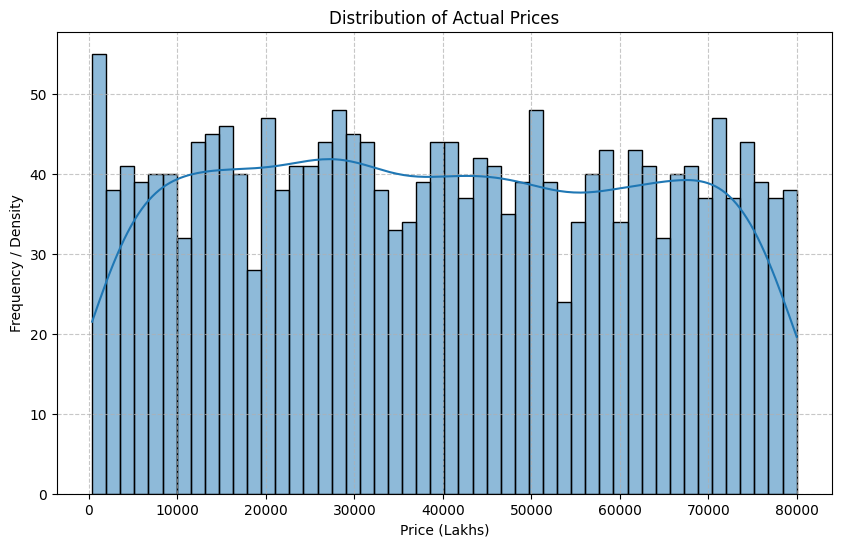

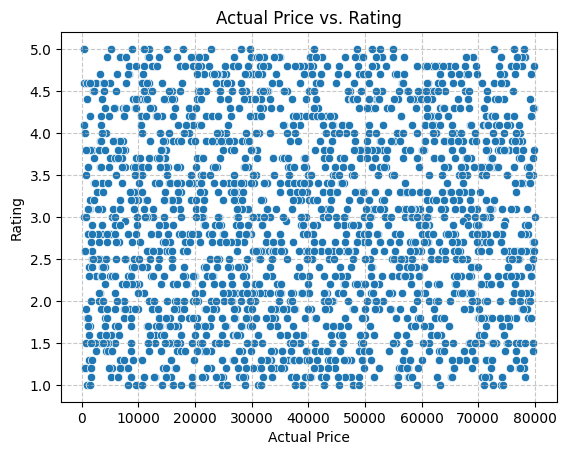

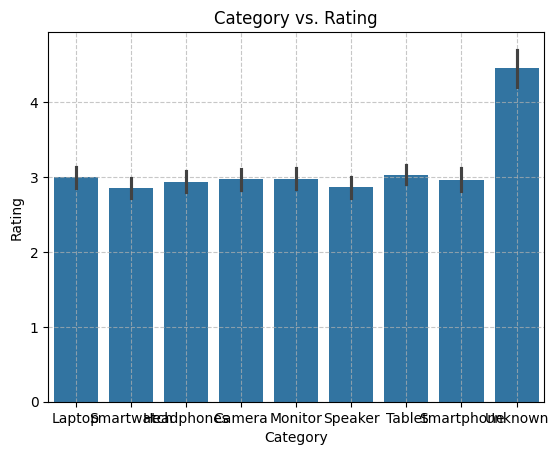

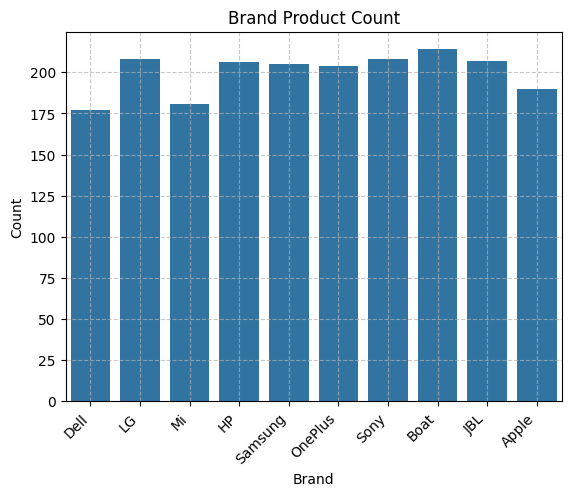

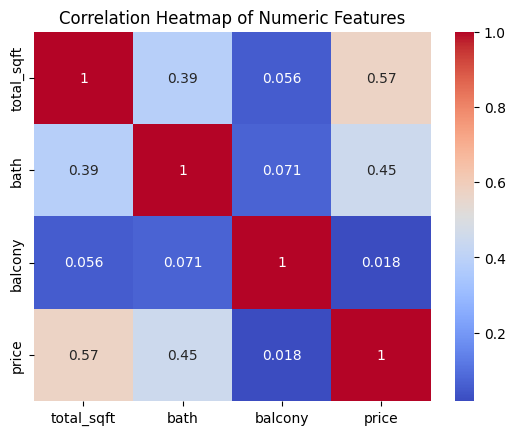

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['actual_price'], kde=True, bins=50) # Adjust bins as needed for better visualization
plt.title('Distribution of Actual Prices')
plt.xlabel('Price (Lakhs)')
plt.ylabel('Frequency / Density')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()
sns.scatterplot(x='actual_price',y='rating',data=df)
plt.title('Actual Price vs. Rating')
plt.xlabel('Actual Price')
plt.ylabel('Rating')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()
sns.barplot(x='category',y='rating',data=df)
plt.title('Category vs. Rating')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()
sns.countplot(x='brand',data=df)
plt.title('Brand Product Count')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm') # Added cmap for better visualization
plt.title('Correlation Heatmap of Numeric Features')
plt.show()